<a href="https://colab.research.google.com/github/yashjain-99/Projects/blob/main/Road_sign_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
local_zip = "/content/drive/MyDrive/Colab Notebooks/archive.zip"
zip_ref = zipfile.ZipFile(local_zip, 'r')
os.mkdir('/content/sign_recog')
zip_ref.extractall('/content/sign_recog')
zip_ref.close()

In [38]:
base_dir='/content/sign_recog'

In [39]:
annot= '/content/sign_recog/annotations'
img = '/content/sign_recog/images'

In [40]:
for i,j in zip(sorted(os.listdir(annot)),sorted(os.listdir(img))):
  tree = ElementTree.parse(os.path.join('/content/sign_recog/annotations',i))
  xroot = tree.getroot()
  for abstract in xroot.iter('annotation'):
    for p in abstract.iter('object'):
      for z in p.iter('name'):
        name = z.text.strip()
        if os.path.exists(os.path.join('/content/sign_recog',name)) == False:
          os.mkdir(os.path.join('/content/sign_recog',name))
        shutil.copy(os.path.join('/content/sign_recog/images',j),os.path.join('/content/sign_recog',name))

In [41]:
l=['crosswalk','speedlimit','stop','trafficlight']
os.mkdir('/content/sign_recog/training')
os.mkdir('/content/sign_recog/validation')
for i in l:
  os.mkdir(os.path.join('/content/sign_recog/training',i))
  os.mkdir(os.path.join('/content/sign_recog/validation',i))


In [43]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    l=len(os.listdir(SOURCE))
    train_len=int(l*SPLIT_SIZE)
    random_train=random.sample(os.listdir(SOURCE),train_len)
    for i in random_train:
        shutil.copy(SOURCE + i, TRAINING)
    for i in os.listdir(SOURCE):
        if i not in random_train:
            shutil.copy(SOURCE + i, TESTING)

crosswalk_SOURCE_DIR = '/content/sign_recog/crosswalk/'
TRAINING_crosswalk_DIR = '/content/sign_recog/training/crosswalk/'
TESTING_crosswalk_DIR = "/content/sign_recog/validation/crosswalk/"

speedlimit_SOURCE_DIR = '/content/sign_recog/speedlimit/'
TRAINING_speedlimit_DIR = '/content/sign_recog/training/speedlimit/'
TESTING_speedlimit_DIR = "/content/sign_recog/validation/speedlimit/"

stop_SOURCE_DIR = '/content/sign_recog/stop/'
TRAINING_stop_DIR = '/content/sign_recog/training/stop/'
TESTING_stop_DIR = "/content/sign_recog/validation/stop/"

trafficlight_SOURCE_DIR = '/content/sign_recog/trafficlight/'
TRAINING_trafficlight_DIR = '/content/sign_recog/training/trafficlight/'
TESTING_trafficlight_DIR = "/content/sign_recog/validation/trafficlight/"
split_size = .9
split_data(crosswalk_SOURCE_DIR,TRAINING_crosswalk_DIR, TESTING_crosswalk_DIR, split_size)
split_data(speedlimit_SOURCE_DIR, TRAINING_speedlimit_DIR, TESTING_speedlimit_DIR, split_size)
split_data(stop_SOURCE_DIR, TRAINING_stop_DIR, TESTING_stop_DIR, split_size)
split_data(trafficlight_SOURCE_DIR, TRAINING_trafficlight_DIR, TESTING_trafficlight_DIR, split_size)



In [44]:
print(len(os.listdir(TRAINING_crosswalk_DIR)))
print(len(os.listdir(TESTING_crosswalk_DIR)))

print(len(os.listdir(TRAINING_speedlimit_DIR)))
print(len(os.listdir(TESTING_speedlimit_DIR)))

print(len(os.listdir(TRAINING_stop_DIR)))
print(len(os.listdir(TESTING_stop_DIR)))

print(len(os.listdir(TRAINING_trafficlight_DIR)))
print(len(os.listdir(TESTING_trafficlight_DIR)))

153
17
610
68
81
10
93
11


In [45]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [46]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [47]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/sign_recog/training"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/sign_recog/validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
)

Found 937 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [48]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.97):
      print("\nReached 97.0% accuracy so cancelling training!")
      self.model.stop_training = True

In [49]:
callbacks = myCallback()
history = model.fit(
    train_generator, 
    epochs=25, 
    steps_per_epoch=20, 
    validation_data = validation_generator, 
    verbose = 1, 
    validation_steps=3,
    callbacks=[callbacks])

Epoch 1/25
20/20 [==============================] - 38s 2s/step - loss: 1.8643 - accuracy: 0.5462 - val_loss: 0.9970 - val_accuracy: 0.6354
Epoch 2/25
20/20 [==============================] - 35s 2s/step - loss: 1.0361 - accuracy: 0.6677 - val_loss: 0.9587 - val_accuracy: 0.6771
Epoch 3/25
20/20 [==============================] - 35s 2s/step - loss: 0.9992 - accuracy: 0.6921 - val_loss: 0.9688 - val_accuracy: 0.6979
Epoch 4/25
20/20 [==============================] - 34s 2s/step - loss: 0.9914 - accuracy: 0.6629 - val_loss: 0.9058 - val_accuracy: 0.6771
Epoch 5/25
20/20 [==============================] - 35s 2s/step - loss: 1.0087 - accuracy: 0.6672 - val_loss: 1.1202 - val_accuracy: 0.6146
Epoch 6/25
20/20 [==============================] - 35s 2s/step - loss: 0.9739 - accuracy: 0.6483 - val_loss: 0.8709 - val_accuracy: 0.6875
Epoch 7/25
20/20 [==============================] - 35s 2s/step - loss: 0.9427 - accuracy: 0.6781 - val_loss: 0.8732 - val_accuracy: 0.6354
Epoch 8/25
20/20 [==

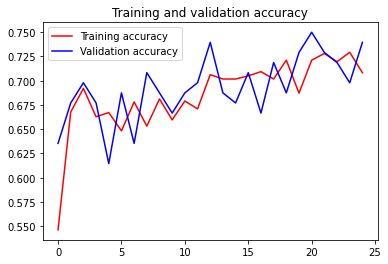

<Figure size 432x288 with 0 Axes>

In [50]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [62]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving traffic light_0.jpg to traffic light_0.jpg
traffic light_0.jpg
[[1. 0. 0. 0.]]


In [ ]:
[cross,speed,stop,trafiic]